In [3]:
import numpy as np             
import pandas as pd  #Python Data Analysis Library handle data in a user friendly way
import scipy as sc
import matplotlib.pyplot as plt #for plots
import seaborn as sns # for better plots
%matplotlib inline
from sklearn import linear_model # A very popular Python library for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #needed to for assessing prediction
from sklearn import datasets ## imports datasets from scikit-learn
import statsmodels.api as sm

from itertools import combinations

We will begin with generating data.

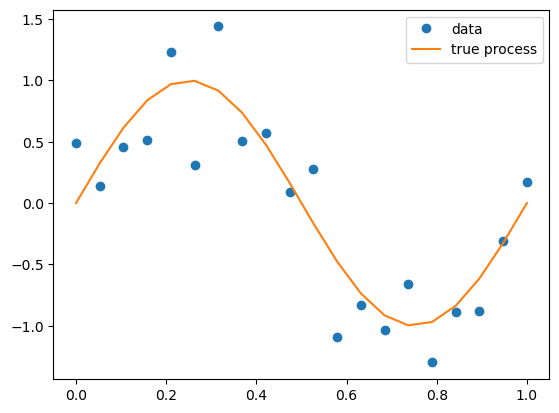

In [13]:
#Polynomial fitting exercises
np.random.seed(1)
n = 20 #number of points
x = np.linspace(0, 1, n)
f = np.sin(2*np.pi*x)
y = f+0.3*np.random.randn(n)
#plt.plot(xg,f,label='true process')
plt.plot(x,y,'o',label='data')
plt.plot(x,f,label='true process')
plt.legend()
plt.savefig("Linnear_Regression_task.png")
plt.show()

We put x,y into the pandas dataframe called data. Also put a vector of ones as x0.

In [5]:
x0 = np.ones(n)
data = pd.DataFrame(np.column_stack([y,x0,x]),columns=['y','x0','x']) 
#Expand the data including powers of x up to 10
for i in range(2,11):  #executes the following indented commands for i varying from 3 to 9
    colname = 'x%d'%i # the %d %i puts a different number in the name of each variable
    data[colname] = data['x']**i #raise to the power of i
    # the for loop continues until the first time a command is not indented.
data.head()

,y,x0,x,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.487304,1.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.141173,1.0,0.052632,0.002770,0.000146,0.000008,4.038611e-07,2.125585e-08,1.118729e-09,5.888046e-11,3.098972e-12,1.631038e-13
2,0.455761,1.0,0.105263,0.011080,0.001166,0.000123,1.292355e-05,1.360374e-06,1.431973e-07,1.507340e-08,1.586673e-09,1.670183e-10
3,0.515276,1.0,0.157895,0.024931,0.003936,0.000622,9.813824e-05,1.549551e-05,2.446660e-06,3.863147e-07,6.099706e-08,9.631114e-09
4,1.229023,1.0,0.210526,0.044321,0.009331,0.001964,4.135537e-04,8.706395e-05,1.832925e-05,3.858790e-06,8.123768e-07,1.710267e-07


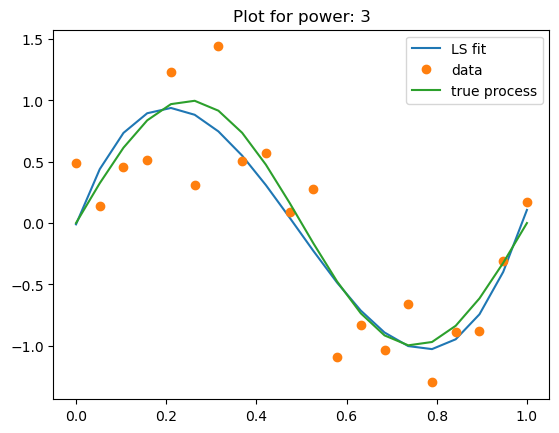

In [16]:
npower = 3
predictors = ['x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
linreg = LinearRegression(fit_intercept=True)
linreg.fit(data[predictors],data['y'])
y_pred = linreg.predict(data[predictors])
plt.plot(data['x'],y_pred, label='LS fit')
plt.plot(data['x'],data['y'],'o',label='data')
plt.plot(x,f,label='true process')
plt.title('Plot for power: %d'%npower)
plt.legend()
plt.savefig("Linnear_Regression_task_power3.png")
plt.show()

### Matrix operations

Below we find the MLE without the scikit linear regression function. For that we

1. Form the design matrix $X$ and the response vector y
2. Calculate the MLE as $$\hat{\beta} = (X^T X)^{-1}X^T y$$

The code below does that and also prints $X^T X$ and $(X^T X)^{-1}$ for checking. ### Matrix operations

Below we find the MLE without the scikit linear regression function. For that we

1. Form the design matrix $X$ and the response vector y
2. Calculate the MLE as $$\hat{\beta} = (X^T X)^{-1}X^T y$$

The code below does that and also prints $X^T X$ and $(X^T X)^{-1}$ for checking.

In [5]:
npower = 2
predictors = ['x0','x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
X = data[predictors]
y = data['y']
XtX = X.T.dot(X) #X.T give X transpose X.dot(b) does matrix multiplication X*b
XtX_inv = sc.linalg.inv(XtX) #sc.linalg.inv(A) provide the inverse of A
beta = XtX_inv.dot(X.T.dot(y))
XtX, XtX_inv, beta

(           x0          x        x2
 x0  20.000000  10.000000  6.842105
 x   10.000000   6.842105  5.263158
 x2   6.842105   5.263158  4.317539,
 array([[ 0.37077922, -1.44350649,  1.17207792],
        [-1.44350649,  7.96601732, -7.42316017],
        [ 1.17207792, -7.42316017,  7.42316017]]),
 array([ 0.88516511, -2.23262046,  0.55870444]))

Check the $\beta$ you found with the scikit function:

The betas found with sklearn matches the betas above!

In [6]:
regression_model = linear_model.LinearRegression(fit_intercept=False)
regression_model.fit(X, y)
beta = regression_model.coef_
print(beta)

[ 0.88516511 -2.23262046  0.55870444]


We can go beyond the point estimate and calculate the variance of $\hat{\beta}$.

The code below provides $\hat{\sigma}^2$, the covariance matrix $\text{var}[\hat{\beta}] = \hat{\sigma}^2 (X^T X)^{-1}$,
and its diagonal.

In [7]:
n,p = X.shape
e = y - X.dot(beta)# beta is your derived MLE coefficents in the previous cells
sigma2_hat = e.T.dot(e)/(n-p)
var_beta = sigma2_hat*(sc.linalg.inv(X.T.dot(X)))
sigma2_hat, var_beta, np.diag(var_beta)

(0.38812469825123386,
 array([[ 0.14390857, -0.56026052,  0.45491239],
        [-0.56026052,  3.09180807, -2.8811118 ],
        [ 0.45491239, -2.8811118 ,  2.8811118 ]]),
 array([0.14390857, 3.09180807, 2.8811118 ]))

With the above quantities we can calculate confidence intervals for MLE's. For those we will need the 97.5\% point of the $t_{n-p}$ distribution. 

The following code does that and also puts the results in pandas dataframe.

In [8]:
#calculate 97.5% CI for beta and present output via a pandas data frame 
tval = sc.stats.t.ppf(0.975,n-p)
std_beta = np.sqrt(np.diag(var_beta))
lower95 = beta - tval*std_beta
upper95 = beta + tval*std_beta
results = np.column_stack([beta,std_beta,lower95,upper95])
col = ['coefficient','se','lower 97.5% bound','upper 97.5% bound']
ind = ['intercept','x','x2']
results = pd.DataFrame(results,columns = col,index=ind)
results

,coefficient,se,lower 97.5% bound,upper 97.5% bound
intercept,0.885165,0.379353,0.084801,1.685530
x,-2.232620,1.758354,-5.942423,1.477182
x2,0.558704,1.697384,-3.022462,4.139871


To check our answers we also use the relevant function (.OLS) of the library **statsmodels**  

In [9]:
Poly = ['x','x2']
X = data[Poly]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     6.704
Date:                Thu, 21 Nov 2024   Prob (F-statistic):            0.00714
Time:                        09:02:57   Log-Likelihood:                -17.289
No. Observations:                  20   AIC:                             40.58
Df Residuals:                      17   BIC:                             43.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8852      0.379      2.333      0.032       0.085       1.686
x             -2.2326      1.758     -1.270      0.221      -5.942       1.477
x2             0.5587      1.697      0.329      0.746      -3.022       4.140
==============================================================================
Omnibus:                        1.146   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.040
Skew:                           0.412   Prob(JB):                        0.595
Kurtosis:                       2.245   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the following cells:
1. Obtain the MLEs and 97.5\% confidence intervals for the 3rd order polynomial without using the scikit function.
2. Check your answers against the statsmodels corresponding function (.OLS)

In [10]:
npower = 3
predictors = ['x0','x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
X = data[predictors]
y = data['y']
XtX = X.T.dot(X) #X.T give X transpose X.dot(b) does matrix multiplication X*b
XtX_inv = sc.linalg.inv(XtX) #sc.linalg.inv(A) provide the inverse of A
beta = XtX_inv.dot(X.T.dot(y))

print(f"Coeffients: {beta}")

n,p = X.shape
e = y - X.dot(beta)# beta is your derived MLE coefficents in the previous cells
sigma2_hat = e.T.dot(e)/(n-p)
var_beta = sigma2_hat*(sc.linalg.inv(X.T.dot(X)))
sigma2_hat, var_beta, np.diag(var_beta)

#calculate 97.5% CI for beta and present output via a pandas data frame 
tval = sc.stats.t.ppf(0.975,n-p)
std_beta = np.sqrt(np.diag(var_beta))
lower95 = beta - tval*std_beta
upper95 = beta + tval*std_beta
results = np.column_stack([beta,std_beta,lower95,upper95])
#print(results)
col = ['coefficient','se','lower 97.5% bound','upper 97.5% bound']
ind = ['intercept','x','x2', "x3"]
results = pd.DataFrame(results,columns = col,index=ind)
results

Coeffients: [-1.04599220e-02  1.01246635e+01 -3.11393971e+01  2.11320677e+01]


,coefficient,se,lower 97.5% bound,upper 97.5% bound
intercept,-0.010460,0.290987,-0.627324,0.606404
x,10.124663,2.586393,4.641755,15.607572
x2,-31.139397,6.102501,-44.076122,-18.202672
x3,21.132068,4.006810,12.638011,29.626125


In [11]:
Poly = ['x','x2', "x3"]
X = data[Poly]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     20.79
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           9.12e-06
Time:                        09:02:57   Log-Likelihood:                -7.2153
No. Observations:                  20   AIC:                             22.43
Df Residuals:                      16   BIC:                             26.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.291     -0.036      0.972      -0.627       0.606
x             10.1247      2.586      3.915      0.001       4.642      15.608
x2           -31.1394      6.103     -5.103      0.000     -44.076     -18.203
x3            21.1321      4.007      5.274      0.000      12.638      29.626
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   2.750
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.470
Skew:                           0.142   Prob(JB):                        0.790
Kurtosis:                       2.305   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will now put all the previous talk into a function. In other words we will create our own function rather than using the stasmodels/scikit learn ones. 

The inputs of the function will be $X$, $y$ and the names of the predictors. The output will be a data frame with the results (MLE's, se's and 95\% CI's).

Write this function  below.

In [19]:
def linear_regression(X: np.array, y: np.array, predictors: list) -> pd.DataFrame:
    XtX = X.T.dot(X) 
    XtX_inv = sc.linalg.inv(XtX) 
    beta = XtX_inv.dot(X.T.dot(y))

    n,p = X.shape
    e = y - X.dot(beta)# beta is your derived MLE coefficents in the previous cells
    sigma2_hat = e.T.dot(e)/(n-p)
    var_beta = sigma2_hat*(sc.linalg.inv(X.T.dot(X)))
    sigma2_hat, var_beta, np.diag(var_beta)
    
    #calculate 95% CI for beta and present output via a pandas data frame 
    tval = sc.stats.t.ppf(0.975,n-p)
    std_beta = np.sqrt(np.diag(var_beta))
    lower95 = beta - tval*std_beta
    upper95 = beta + tval*std_beta
    results = np.column_stack([beta,std_beta,lower95,upper95])
    col = ['coefficient','se','lower 97% bound','upper 97% bound']
    ind = ['intercept'] + predictors[1:]
    results = pd.DataFrame(results,columns = col,index=ind)
    return results

npower = 3
predictors = ['x0','x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
X = data[predictors]
y = data['y']

linear_regression(X, y, predictors)

,coefficient,se,lower 97% bound,upper 97% bound
intercept,-0.010460,0.290987,-0.627324,0.606404
x,10.124663,2.586393,4.641755,15.607572
x2,-31.139397,6.102501,-44.076122,-18.202672
x3,21.132068,4.006810,12.638011,29.626125


### Bayesian Linear Regression

We now turn to Bayesian inference. As before we will illustrate and then create a function that provides summaries of the posterior (Bayes estimates of $\beta$ and 95\% Credible Intervals).

We start by calculating the posterior parameters that correspond to the unit information prior.

Given $\sigma^2$ and a **prior** of N($\mu_0,\sigma^2\Omega_0)$, the **posterior** $\pi(\beta|X,y,\sigma^2)$ is N($\mu_n,\sigma^2\Omega_n^2$) where

$$\mu_n = (X^T X+\Omega_0^{-1})^{-1} (\Omega_0^{-1}\mu_0 +X^{T}y)$$
$$\Omega_n =(X^T X +\Omega_0^{-1})^{-1}$$

To assign the unit information prior we set $\Omega_0 = n(X^T X)^{-1}$ or else $\Omega_0^{-1}=X^T X / n$.

For $\sigma^2$ if we set the **prior** $IGamma(a_0, b_0)$ we get the **posterior** $IGamma(a_n, b_n)$ where
$$
a_n = a_0+\frac{n}{2}
$$
$$
b_n = b_0+\frac{1}{2} (y^T y + \mu_0^T\Omega_0^{-1}\mu_0 -\mu_n^T\Omega_n^{-1}\mu_n).
$$

Calculate posterior parameters in the following cell

In [24]:
import scipy.stats as stats
def calculate_posterior_parameters(X, y, mu_0, Omega_0, a_0, b_0):
    # Calculate posterior parameters for beta
    Omega_0_inv = np.linalg.inv(Omega_0)
    XTX = np.dot(X.T, X)
    mu_n = np.linalg.inv(XTX + Omega_0_inv).dot(Omega_0_inv.dot(mu_0) + np.dot(X.T, y))
    Omega_n = np.linalg.inv(XTX + Omega_0_inv)
    
    # Calculate posterior parameters for sigma^2
    n = len(y)
    a_n = a_0 + n / 2
    b_n = b_0 + 0.5 * (np.dot(y.T, y) + np.dot(mu_0.T, Omega_0_inv.dot(mu_0)) - np.dot(mu_n.T, np.linalg.inv(Omega_n).dot(mu_n)))
    
    return mu_n, Omega_n, a_n, b_n

# Step 1
npower = 3
predictors = ['x0','x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
X = data[predictors]
y = data['y']
n,p = X.shape

#Assumtion 
mu_0 = np.zeros(npower+1)
Omega_0 = np.eye(npower+1)
a_0 = 1
b_0 = 1

mu_n, Om_n, a_n, b_n = calculate_posterior_parameters(X, y, mu_0, Omega_0,a_0,b_0)#TODO check if a_0 and b_0 are correct values

print("Posterior mean (mu_n):", mu_n)
print("Posterior covariance (Omega_n):", Om_n)
print("Posterior shape parameter (a_n):", a_n)
print("Posterior scale parameter (b_n):", b_n)

Posterior mean (mu_n): [ 0.44437677 -0.59197546 -0.48754393 -0.16653853]
Posterior covariance (Omega_n): [[ 0.1222622  -0.15604254 -0.01970191  0.02426713]
 [-0.15604254  0.62136094 -0.27665627 -0.1983229 ]
 [-0.01970191 -0.27665627  0.69304669 -0.29670317]
 [ 0.02426713 -0.1983229  -0.29670317  0.66570177]]
Posterior shape parameter (a_n): 11.0
Posterior scale parameter (b_n): 5.036870365926265


In [25]:
def calculate_credible_intervals(mu_n, Omega_n, alpha=0.05):
    # Calculate the standard deviation of the posterior distribution
    std_n = np.sqrt(np.diag(Omega_n))
    
    # Calculate the critical value for the 95% credible interval
    z = stats.norm.ppf(1 - alpha / 2)
    
    # Calculate the lower and upper bounds of the 95% credible interval
    lower_bound = mu_n - z * std_n
    upper_bound = mu_n + z * std_n
    
    return lower_bound, upper_bound

lower_bound, upper_bound = calculate_credible_intervals(mu_n, Om_n)

# Print the results
for i, predictor in enumerate(predictors):
    print(f"Predictor: {predictor}")
    print(f"Mean: {mu_n[i]}")
    print(f"95% Credible Interval: [{lower_bound[i]}, {upper_bound[i]}]\n")

Predictor: x0
Mean: 0.444376773552293
95% Credible Interval: [-0.24094446879495113, 1.1296980158995371]

Predictor: x
Mean: -0.5919754592217462
95% Credible Interval: [-2.1369455073086074, 0.9529945888651151]

Predictor: x2
Mean: -0.48754393107971494
95% Credible Interval: [-2.119202700191935, 1.1441148380325055]

Predictor: x3
Mean: -0.1665385291139334
95% Credible Interval: [-1.76568391057673, 1.432606852348863]



#### Monte Carlo for credible intervals

To obtain credible intervals for $\beta$ we could use the $t$ distribution. But we would use Monte Carlo instead as this will cover more general models. e.g. logistic regression.

So we will sample $N$ Monte Carlo samples from $\pi(\beta|y)$ and use them  for Monte Carlo inference (credible intervals, density plots etc)

Monte Carlo Samples can be drawn by

1. Generating samples $\sigma_i^2$ from $Gamma(\alpha_n,\beta_n)$, $i=1,\dots,N$,
2. Draw $\beta_i$ sample based on each $\sigma_i^2$ from N($\mu_n,\sigma^2\Omega_n^2$)

In [14]:
#Calculate 95% credible intervals
N = 10000 #number of Monte Carlo samples
sigma2 = 1/np.random.gamma(a_n, 1/b_n, N)
betas = np.zeros((N,p))
# draw N samples from the marginal posterior of beta
for i in range(0,N):
    s2 =sigma2[i]
    cov = s2*Om_n

    betas[i,] = np.random.multivariate_normal(mu_n,cov,1)

#find the mean of each column which corresponds to each beta coefficient     
mu_beta = np.mean(betas, axis=0)
#find the 2.5 and 97.5 percentils which correspond to each beta coefficient 
lower95 = np.percentile(betas,2.5,axis=0)
upper95 = np.percentile(betas,97.5,axis=0)
mu_beta, lower95, upper95

(array([ 0.44530639, -0.59140307, -0.48787457, -0.17013566]),
 array([-0.04777506, -1.69137007, -1.65918852, -1.30728254]),
 array([0.93439513, 0.53263736, 0.68467079, 1.00100206]))

As before we put it all in a function. This is quite handy as it is hard to find such a function in Python!!As before we put it all in a function. This is quite handy as it is hard to find such a function in Python!!

In [15]:
# function for Bayesian Linear regression, return posterior mean and 95% CIs
def BLR(X,y,mu_0,Om_0_inv,a_0,b_0,ind_names,N):
    col_names = ['posterior mean','lower 95% bound','upper 95% bound']
    n,p = X.shape
    XtX = X.T.dot(X)
    Om_n_inv = XtX + Om_0_inv
    Om_n = sc.linalg.inv(Om_n_inv)
    term1 = Om_0_inv.dot(mu_0)+X.T.dot(y)
    mu_n = Om_n.dot(term1)
    a_n = a_0 + n/2
    term2 = y.T.dot(y)+mu_0.dot(Om_0_inv.dot(mu_0))-mu_n.dot(Om_n_inv.dot(mu_n))
    b_n = b_0 + term2/2
    sigma2 = 1/np.random.gamma(a_n, 1/b_n, N)
    betas = np.zeros((N,p))
    # draw N samples from the marginal posterior of beta
    for i in range(0,N):
        s2 =sigma2[i]
        cov = s2*Om_n
        betas[i,] = np.random.multivariate_normal(mu_n,cov,1)

    #find the mean of each column which corresponds to each beta coefficient     
    mu_beta = np.mean(betas, axis=0)
    #find the 2.5 and 97.5 percentils which correspond to each beta coefficient 
    lower95 = np.percentile(betas,2.5,axis=0)
    upper95 = np.percentile(betas,97.5,axis=0)
    results = np.column_stack([mu_beta,lower95,upper95])
    results = pd.DataFrame(results,columns = col_names,index=ind_names)
    return results, mu_n, Om_n, a_n, b_n

### Marginal likelihood / Model Evidence

Finally we will calculate the marginal likelihood / model evidence of a given model. We will use the following trick covered in the lecture

We can write
$$
\pi(\beta,\sigma^2|y,X)=\frac{\pi(y|\beta,\sigma^2,X)\pi(\beta,\sigma^2)}{\pi(y|X)},
$$
or else
$$
\pi(y|X)=\frac{\pi(y|\beta,\sigma^2,X)\pi(\beta,\sigma^2)}{\pi(\beta,\sigma^2|y,X)},
$$
for all $\beta, \sigma^2$.

The expression above contains known Normal and Inverse Gamma pdfs so we can just evaluate for -say- the posterior mean of $\beta$, $\sigma^2$.

The calculation involves the following steps

1. Specify data and prior
2. get the parameters of the posteriod distribution
3. evaluate the log-likelihood, log-prior and log-posterior at the posterior mean
4. The log-evidence is equal to log-likelihood + log-prior - log-posterior

In [16]:
# Step 1
npower = 3
predictors = ['x0','x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
X = data[predictors]
y = data['y']
n,p = X.shape

# Step 2
mu_0 = np.zeros(p)
XtX = X.T.dot(X)
Om_0_inv = XtX/n #unit information prior
a_0 = 0.1
b_0 = 0.1
N=10000 #Monte Carlo sample size
results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)

# Step 3
# evaluate log-likelihood
beta = mu_n
sigma2 = b_n/(a_n-1)
Om_0 = sc.linalg.inv(Om_0_inv)
mu = X.dot(beta)
cov = sigma2*np.eye(n)
ll = sc.stats.multivariate_normal.logpdf(y,mu,cov)
# evaluate log-prior
lprior = a_0*np.log(b_0)-sc.special.loggamma(a_0)- (a_0+1)*np.log(sigma2)-b_0/sigma2
lprior = lprior + sc.stats.multivariate_normal.logpdf(beta,mu_0,sigma2*Om_0)
# evaluate log-posterior
lpost = a_n*np.log(b_n)-sc.special.loggamma(a_n)- (a_n+1)*np.log(sigma2)-b_n/sigma2
lpost = lpost + sc.stats.multivariate_normal.logpdf(beta,mu_n,sigma2*Om_n)

lmodevid = ll+lprior-lpost
lmodevid

-18.21251591383808

Let's make it a function. Again not easy to find such a function, keep it!

In [17]:
def ModEvidence(X,y,mu_n,Om_n,mu_0,Om_0_inv,a_n,b_n,a_0,b_0): 
    beta = mu_n
    sigma2 = b_n/(a_n-1)
    Om_0 = sc.linalg.inv(Om_0_inv)
    mu = X.dot(beta)
    cov = sigma2*np.eye(X.shape[0])
    ll = sc.stats.multivariate_normal.logpdf(y,mu,cov)
    # evaluate log-prior
    lprior = a_0*np.log(b_0)-sc.special.loggamma(a_0)- (a_0+1)*np.log(sigma2)-b_0/sigma2
    lprior = lprior + sc.stats.multivariate_normal.logpdf(beta,mu_0,sigma2*Om_0)
    # evaluate log-posterior
    lpost = a_n*np.log(b_n)-sc.special.loggamma(a_n)- (a_n+1)*np.log(sigma2)-b_n/sigma2
    lpost = lpost +sc.stats.multivariate_normal.logpdf(beta,mu_n,sigma2*Om_n)
    lmodevid = ll+lprior-lpost
    return lmodevid

Now to get the evidence for a model we can simply use the code below

In [18]:
# Data
npower = 2
predictors = ['x0','x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])
X = data[predictors]
y = data['y']
n,p = X.shape

# Prior
mu_0 = np.zeros(p)
XtX = X.T.dot(X)
Om_0_inv = XtX/n #unit information prior
a_0 = 0.1
b_0 = 0.1

# Calculation
N=10000 #Monte Carlo sample size
results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)
lmodevid = ModEvidence(X,y,mu_n,Om_n,mu_0,Om_0_inv,a_n,b_n,a_0,b_0)
lmodevid

-25.122117003562526

Consider polynomials from order 2 to 6. Find the order of polynomial with the highest model evidence.

In [19]:

def calculate_model_evidence(data, y_col, predictors, a_0=0.1, b_0=0.1, N=10000):
    X = data[predictors]
    y = data[y_col]
    n, p = X.shape
    
    mu_0 = np.zeros(p)
    XtX = X.T.dot(X)
    Om_0_inv = XtX / n
    
    # Calculations
    results, mu_n, Om_n, a_n, b_n = BLR(X, y, mu_0, Om_0_inv, a_0, b_0, predictors, N)
    lmodevid = ModEvidence(X, y, mu_n, Om_n, mu_0, Om_0_inv, a_n, b_n, a_0, b_0)
    
    return lmodevid, mu_n
def find_best_polynomial_order(data, y_col, orders, a_0=0.1, b_0=0.1, N=10000):
    best_order = None
    best_lmodevid = -np.inf
    
    for order in orders:
        predictors = ['x0', 'x']
        predictors.extend(['x%d' % i for i in range(2, order + 1)])
        lmodevid, _=calculate_model_evidence(data, y_col, predictors, a_0, b_0, N)

        
        if lmodevid > best_lmodevid:
            best_lmodevid = lmodevid
            best_order = order
    
    return best_order



orders = range(2, 7)
best_order = find_best_polynomial_order(data, 'y', orders, a_0=0.1, b_0=0.1, N=10000)
print("Best polynomial order:", best_order)

Best polynomial order: 3


### Autmobile Bodily Injury Claims Data

Source: Insurance Research Council (IRC)

The data are automobile injury claims data using data from the Insurance Research Council (IRC), a division of the American Institute for Chartered Property Casualty Underwriters and the Insurance Institute of America. The data, collected in 2002, contains information on the gender of the claimant, attorney involvement, years of driving experience and the economic loss (LOSS, in thousands). A detailed description of the variables in the data is provided below:

- Attorney: Whether the claimant is represented by an attorney (=1 if yes and =0 if no)
- CLMSEX: Claimant’s gender (=1 if male and =0 if female 
- CLMAGE: Claimant’s age minus the age driving license was obtained
- LOSS: The claimant’s total economic loss (in thousands $)

For confidentiality issues we consider here a sample of  simulated data similar to that of a state is considered. 

The data are in the provided file 'automobileBI.csv'

In [20]:
Auto = pd.read_csv("automobileBI.csv") 
Auto.head()

,ATTORNEY,CLMSEX,CLMAGE,LOSS
0,1,0,1.8,6.38
1,0,0,5.6,0.95
2,1,1,1.4,1.88
3,0,1,5.4,0.11
4,1,0,0.9,6.95


In [21]:
Auto.describe()

,ATTORNEY,CLMSEX,CLMAGE,LOSS
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,0.510802,0.423611,4.885571,4.616821
std,0.500076,0.494321,4.586972,7.570060
min,0.000000,0.000000,0.100000,0.010000
25%,0.000000,0.000000,1.700000,0.637500
50%,1.000000,0.000000,3.300000,2.000000
75%,1.000000,1.000000,6.600000,5.227500
max,1.000000,1.000000,31.300000,76.170000


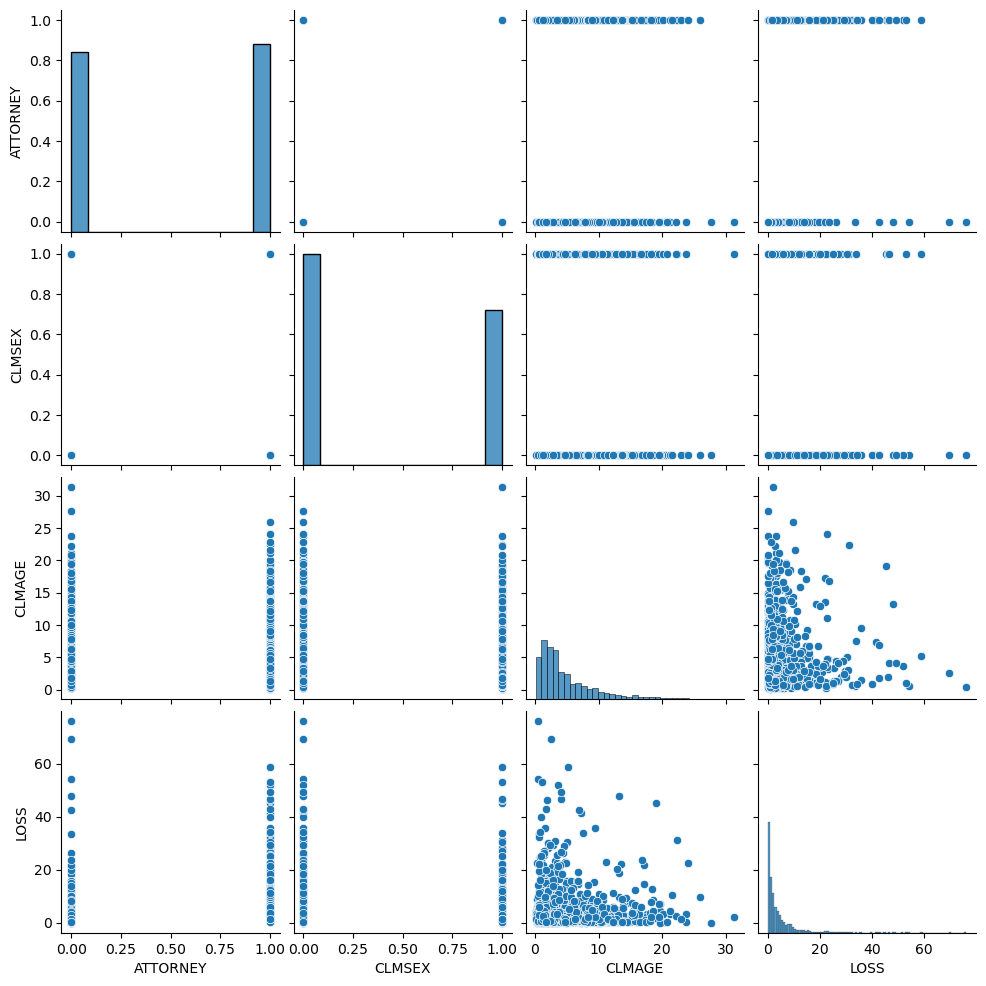

In [22]:
sns.pairplot(Auto)
plt.show()

Consider all possible regression models with the LOSS variable as response and some (or all or none) of the other variables present (in their current form, no polynomials). There are 8 such models.

Calculate the model evidence for each of them, report the optimal one and present posterior estimates of its coefficients.

In [23]:
def find_best_model(data, response, predictors, a_0=0.1, b_0=0.1, N=10000):
    best_lmodevid = -np.inf
    best_mu_n = None
    
    for k in range(1, len(predictors) + 1):
        for subset in combinations(predictors, k):#Creates a subset of all 8 possibel predictors 
            lmodevid, mu_n = calculate_model_evidence(data, response, list(subset), a_0, b_0, N)
            
            if lmodevid > best_lmodevid:
                best_lmodevid = lmodevid
                best_model = subset
                best_mu_n = mu_n
    
    return best_model, best_lmodevid, best_mu_n


response = 'LOSS'
predictors = ['ATTORNEY', 'CLMSEX', 'CLMAGE']

best_model, best_lmodevid, best_mu_n = find_best_model(Auto, response, predictors)
print("Best model predictors:", best_model)
print("Best model log evidence:", best_lmodevid)
print("Posterior estimates of coefficients:", best_mu_n)

Best model predictors: ('ATTORNEY', 'CLMAGE')
Best model log evidence: -4454.542855421381
Posterior estimates of coefficients: [5.72902644 0.1782908 ]
